<a href="https://www.kaggle.com/code/altarnolutarkan/neural-network-from-scratch?scriptVersionId=129967010" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import shutil
import PIL
import cv2
import os
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
cd ..

/kaggle


In [3]:
os.mkdir('working/train')
os.mkdir('working/test')

In [4]:
original_folder_cat = "input/microsoft-catsvsdogs-dataset/PetImages/Cat/"
original_folder_dog = "input/microsoft-catsvsdogs-dataset/PetImages/Dog/"
traindata_folder = "working/train"
testdata_folder = "working/test"

In [5]:
# source folder directory of data(src_path)
# distance folder directory of data(dst_path)
# number of data wanted to label(number)
# name of the label like cat or dog(class name)
def label(src_path,dst_path,number,class_name,start): 
    c=0
    for file in os.listdir(src_path)[start:]: # get raw datas file names
        if c==number: # check how many data labelled
            break
        if os.stat(src_path+file).st_size<1000: # check whether image is broken or not
            continue
        else:
            file_src_path = os.path.join(src_path,file) # path of the file where we want to copy
            file_dst_path = os.path.join(dst_path,class_name+str(c)) # path of the file where we want to paste
            shutil.copy(file_src_path,file_dst_path)
            c+=1

In [6]:
# train folder
label(original_folder_cat,traindata_folder,500,'cat',0)
label(original_folder_dog,traindata_folder,500,'dog',0)
# test folder
label(original_folder_cat,testdata_folder,100,'cat',501)
label(original_folder_dog,testdata_folder,100,'dog',501)

In [7]:

def x_array(var):
    empty = []
    files = os.listdir(f'working/{var}/')

    for file in files:
        img=PIL.Image.open(f'working/{var}/{file}')
        img = img.resize((60,60)).convert('RGB')
        try:
            img_arr = np.array(img).reshape(60,60,3)
        except ValueError as v:
            print(v)
            print(file)
        empty.append(img_arr)
    return np.array(empty)

In [8]:
x_train = x_array('train')
x_test = x_array('test')
print('x_train :'+str(x_train.shape)+ ' x_test :'+str(x_test.shape))

x_train :(1000, 60, 60, 3) x_test :(200, 60, 60, 3)


In [9]:

def y_array(var):
    label = []
    for i in os.listdir(f'working/{var}/'):
        if i[0:3] == 'dog':
            label.append(1)
        else:
            label.append(0)
    return np.asarray(label)

In [10]:
y_train = y_array('train').reshape(1000,1).T
y_test = y_array('test').reshape(200,1).T
print(f'y_train:{y_train.shape} , y_test:{y_test.shape}')

y_train:(1, 1000) , y_test:(1, 200)


In [11]:
dim = 60*60*3
X = x_train.reshape(1000,dim).T
Xtest = x_test.reshape(200,dim).T
print(f'X_train:{X.shape} , X_test:{Xtest.shape}')

X_train:(10800, 1000) , X_test:(10800, 200)


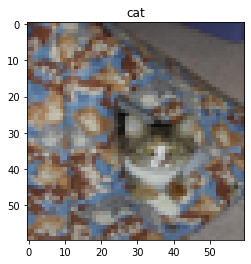

In [12]:
def check(index):
    yt=y_train.T
    plt.imshow(x_train[index])
    plt.title('dog' if yt[index]==1 else 'cat')
check(73)

**INITIALIZE PARAMETERS**

In [13]:
def initialize(dim):
    par={}
    for i in range(1,len(dim)):
        par['W'+str(i)] = np.random.randn(dim[i],dim[i-1])*0.01
        par['b'+str(i)] = np.zeros((dim[i],1))
    
    return par

In [14]:
d=[dim,5,5,1]
p=initialize(d)
for i in p.keys():
    print(p[i].shape,i)

(5, 10800) W1
(5, 1) b1
(5, 5) W2
(5, 1) b2
(1, 5) W3
(1, 1) b3


**ACTIVATION FUNCTIONS**

In [15]:
def sigmoid(z):
    A = 1/(1+np.exp(-z))
    return A

def reLu(z):
    A=np.maximum(0,z)
    return A

def tanh(x):
    return np.tanh(x)

def derivative_relu(Z):
    return np.array(Z > 0, dtype = 'float')

def derivative_tanh(x):
    return 1.-np.tanh(x)**2
    

**FORWARD PROPOGATİON**

In [16]:
def forward_propogation(parameters,X):
    
    forward_cache = {}
    
    forward_cache['A0'] = X
    
    L = len(parameters)//2 # it will return integer instead of float
    
    for i in range(1,L):
        forward_cache['Z'+str(i)] = np.dot(parameters['W'+str(i)],forward_cache['A'+str(i-1)]) + parameters['b'+str(i)]
        forward_cache['A'+str(i)] = reLu(forward_cache['Z'+str(i)])
        
    forward_cache['Z'+str(L)] = np.dot(parameters['W'+str(L)],forward_cache['A'+str(L-1)]) + parameters['b'+str(L)]
    forward_cache['A'+str(L)] = sigmoid(forward_cache['Z'+str(L)])

    
    return forward_cache['A'+str(L)],forward_cache

In [17]:
al,f=forward_propogation(p,X)
for i in f.keys():
    print(f[i].shape,i)

(10800, 1000) A0
(5, 1000) Z1
(5, 1000) A1
(5, 1000) Z2
(5, 1000) A2
(1, 1000) Z3
(1, 1000) A3


**COST FUNCTION**

In [18]:
def cost(y,AL):
    
    m = y.shape[1]
    
    cost = (1./m)*(-np.dot(y,np.log(AL).T) - np.dot(1-y,np.log(1-AL).T))
    cost=np.squeeze(cost)
    return cost

**BACWARD PROPOGATİON**

In [19]:
def backward_propogation(forward_cache,AL,Y,parameters):
    
    grads={}
    
    L = len(parameters)//2
    
    m=Y.shape[1]

    grads['dZ'+str(L)] = AL-Y
    grads['dW'+str(L)] = 1./m * np.dot(grads["dZ" + str(L)],forward_cache['A' + str(L-1)].T)
    grads['dB'+str(L)] = 1./m * np.sum(grads["dZ" + str(L)], axis = 1, keepdims = True)
    
    for i in reversed(range(1,L)):
        grads['dZ'+str(i)] = np.dot(parameters['W'+str(i+1)].T,grads['dZ'+str(i+1)])*derivative_relu(forward_cache['Z'+str(i)])
        grads['dW'+str(i)] = np.dot(grads['dZ'+str(i)],forward_cache['A'+str(i-1)].T)/m
        grads['dB'+str(i)] = np.sum(grads['dZ'+str(i)],axis=1,keepdims=True)/m
        
    return grads    

In [20]:
g=backward_propogation(f,al,y_train,p)
for i in g.keys():
    print(g[i].shape,i)

(1, 1000) dZ3
(1, 5) dW3
(1, 1) dB3
(5, 1000) dZ2
(5, 5) dW2
(5, 1) dB2
(5, 1000) dZ1
(5, 10800) dW1
(5, 1) dB1


**UPDATE PARAMETERS**

In [21]:
def update_parameters(grads,parameters,learning_rate):
    
    L = len(parameters)//2
    
    for i in range(L):
        parameters['W'+str(i+1)] = parameters['W'+str(i+1)] - learning_rate*grads['dW'+str(i+1)]
        parameters['b'+str(i+1)] = parameters['b'+str(i+1)] - learning_rate*grads['dB'+str(i+1)]
    return parameters

In [22]:
p1=update_parameters(g,p,0.1)
for i in p1.keys():
    print(p1[i].shape,i)

(5, 10800) W1
(5, 1) b1
(5, 5) W2
(5, 1) b2
(1, 5) W3
(1, 1) b3


**CREATE MODEL**

In [23]:
def model(X,Y,learning_rate,iterations,layer_dims):
    
    par = initialize(layer_dims)
    
    for i in range(iterations):
        AL,forward_cache = forward_propogation(par,X)
        c = cost(Y,AL)
        grads = backward_propogation(forward_cache,AL,Y,par)
        par = update_parameters(grads,par,learning_rate)
        
        if i%10==0:
            print(f'cost after {i} number of iterations: {c}')
            #print("==",end='')
        
    
    return par

In [24]:
X_TRAIN = X/255
Y_TRAIN = y_train
par = model(X_TRAIN,Y_TRAIN,0.01,10000,[X_TRAIN.shape[0],24,Y_TRAIN.shape[0]])

cost after 0 number of iterations: 0.6934364831088213
cost after 10 number of iterations: 0.6932916546554801
cost after 20 number of iterations: 0.6931690064245207
cost after 30 number of iterations: 0.6930382719994626
cost after 40 number of iterations: 0.6929060214034077
cost after 50 number of iterations: 0.6927966841845141
cost after 60 number of iterations: 0.6926934166014006
cost after 70 number of iterations: 0.692585261184099
cost after 80 number of iterations: 0.6924718602779752
cost after 90 number of iterations: 0.6923512249947109
cost after 100 number of iterations: 0.6922212080387355
cost after 110 number of iterations: 0.692081307831464
cost after 120 number of iterations: 0.6919275211902952
cost after 130 number of iterations: 0.691760257608152
cost after 140 number of iterations: 0.6915807916428912
cost after 150 number of iterations: 0.6913862279948483
cost after 160 number of iterations: 0.6911747236845771
cost after 170 number of iterations: 0.6909431683057918
cost a

In [25]:
def predict(par,X,Y):
    
    X = X.reshape(60*60*3,200)/255
    
    preds,cache=forward_propogation(par,X)
    
    preds = np.array(preds>0.5,dtype='float')
    
    print('Test Accuracy : %' + str(np.sum(Y==preds)))
    
    return preds

In [26]:
preds=predict(par,x_test,y_test)

Test Accuracy : %99


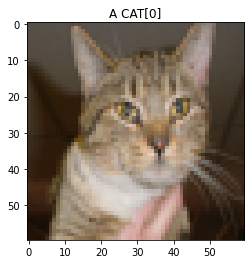

In [27]:
def check(index):
    plt.imshow(x_test[index])
    if preds.T[index]==1:
        plt.title('A CAT'+str(y_test.T[index]))
    else:
        plt.title('A DOG'+str(y_test.T[index]))    

check(95)